---
---
### UNaB: Universidad Nacional Guillermo Brown
#### Inferencia estadística y reconocimiento de patrones

## Prof: Sebastian Simondi
# Alumnos : Lucas León González - David Lobos - Euler Diego




### Parcial N°2 - 26/11/2024
El dataset regresión.csv contiene 154 entradas y 5 columnas con la siguiente información:

* duracion: Duración medida en tiempo (float64).
* paginas: Número de páginas (int64).
* acciones: Número de acciones realizadas (int64).
* valor: Valor numérico o puntuación (int64).
* clase: Categoría o clase (int64).

----
----

##           Ingesta y limpieza de datos

---





In [ ]:
# 1 . IMPORTAR LAS LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuración de estilo
sns.set(style='whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('regresión.csv')

Saving regresión.csv to regresión.csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [ ]:
# Las 5 primeras filas
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [ ]:
# Las ultimas 5 filas
df.tail()

,duracion,paginas,acciones,valor,clase
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0
169,12.0,1,6,18,0


In [ ]:
# 3. REVISAR LOS TIPOS DE DATOS
df.dtypes


,0
duracion,float64
paginas,int64
acciones,int64
valor,int64
clase,int64


In [ ]:
# 4. Eliminar los duplicados
print(f'Original: {df.count()} filas')
duplicate_rows_df =df[df.duplicated()]
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.count()}')

# Eliminar los duplicados
df = df.drop_duplicates()

Original: duracion    170
paginas     170
acciones    170
valor       170
clase       170
dtype: int64 filas
Cantidad de filas duplicadas: duracion    16
paginas     16
acciones    16
valor       16
clase       16
dtype: int64


In [ ]:
#Filas despues de eliminar los duplicados
print(f'Original: {df.count()} filas')

Original: duracion    154
paginas     154
acciones    154
valor       154
clase       154
dtype: int64 filas


In [ ]:
print(df.columns)

Index(['duracion', 'paginas', 'acciones', 'valor', 'clase'], dtype='object')


In [ ]:
# 7. ELIMINAR LOS VALORES PERDIDOS O NULOS
#Encontrar los valores nulos
print(df.isnull().sum())

#Eliminar los valores perdidos
df = df.dropna()
print()

#Despues de eliminar los nulos
print(df.isnull().sum())

duracion    0
paginas     0
acciones    0
valor       0
clase       0
dtype: int64

duracion    0
paginas     0
acciones    0
valor       0
clase       0
dtype: int64


In [ ]:
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


----
----
### Análisis Exploratorio de Datos (EDA)
----

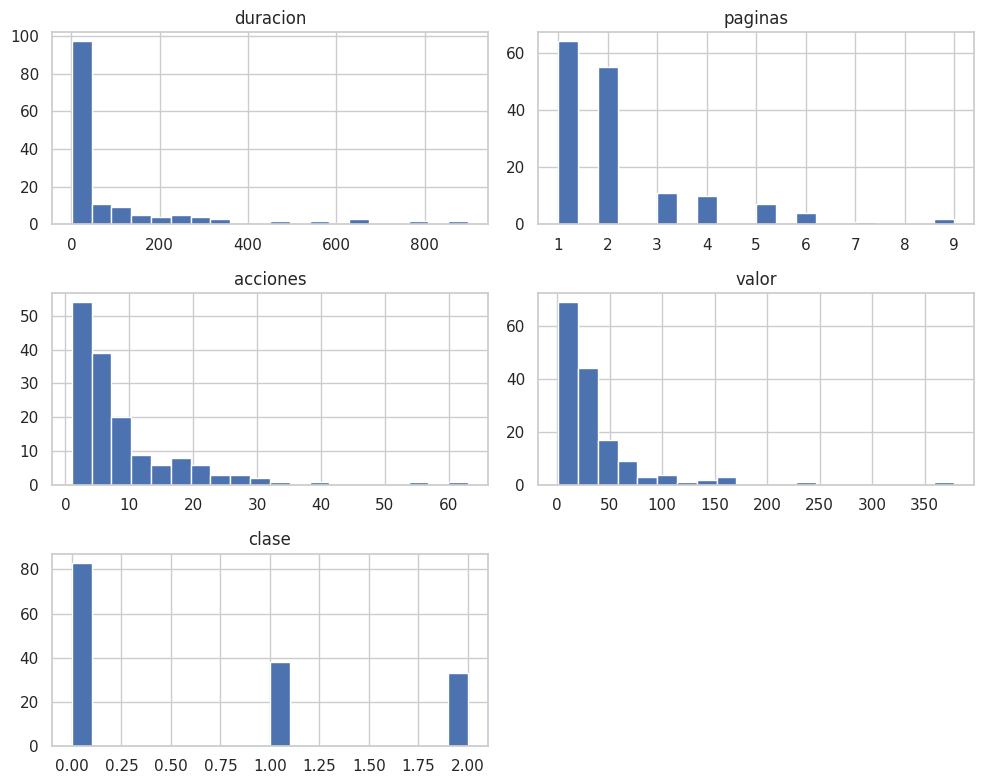

In [ ]:
# Histogramas de las variables
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


## Análisis de Histogramas


### 1. Duración
La mayoría de las duraciones están concentradas cerca de 0, con una disminución gradual a medida que aumenta la duración. Hay unos pocos valores extremos que alcanzan más de 800.

### 2. Páginas
La mayoría de los datos tienen 1 o 2 páginas. El número de páginas disminuye drásticamente después de 2, con muy pocos registros con más de 5 páginas.

### 3. Acciones
La mayoría de las acciones están concentradas entre 0 y 10, con una disminución gradual a medida que el número de acciones aumenta. Hay unos pocos valores extremos que alcanzan hasta 60 acciones.

### 4. Valor
La mayoría de los valores están concentrados cerca de 0, con una disminución gradual a medida que el valor aumenta. Hay unos pocos valores extremos que alcanzan hasta 350.

### 5. Clase
Hay tres clases distintas, representadas como 0, 1 y 2. La clase 0 tiene la mayor cantidad de registros, seguida por la clase 2, y la clase 1 tiene la menor cantidad de registros.



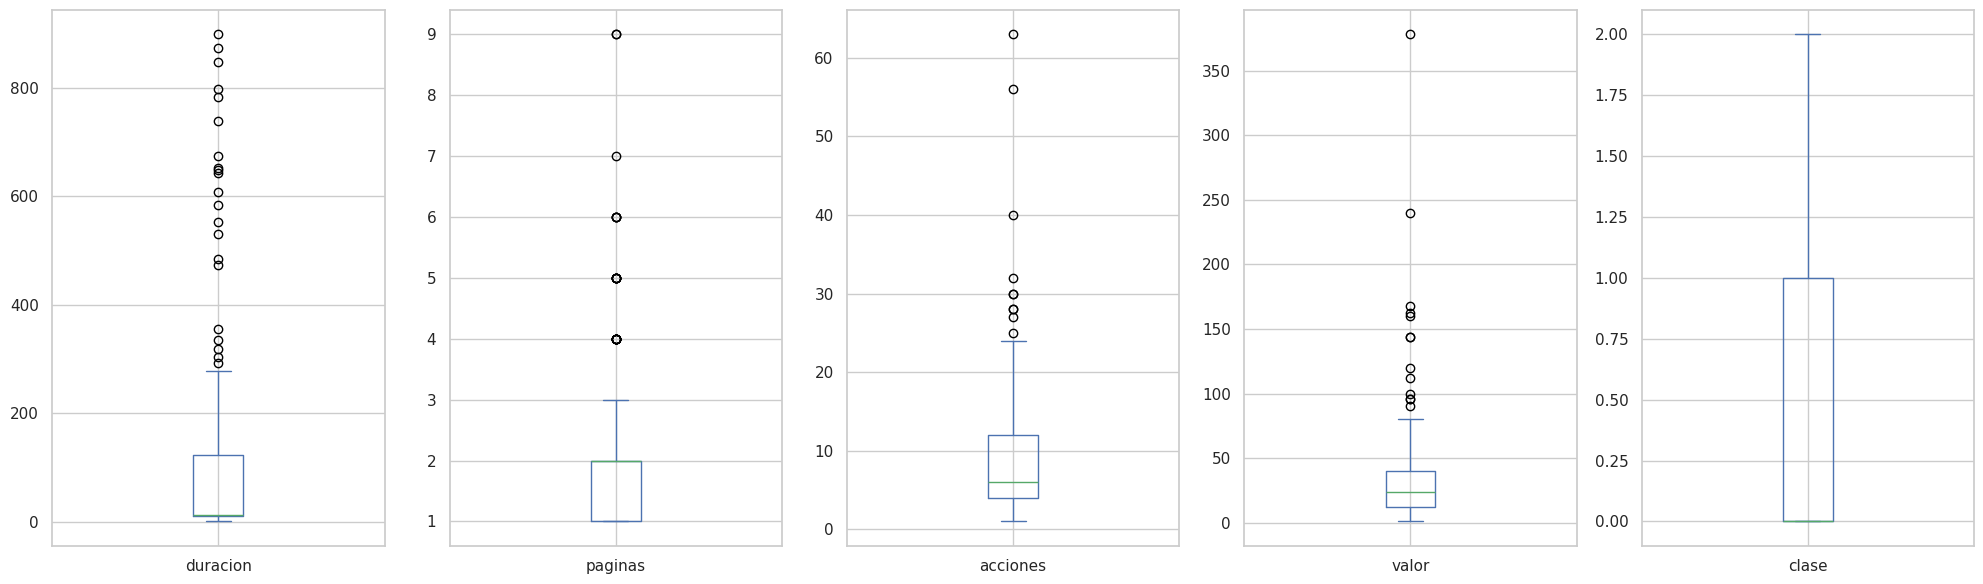

In [ ]:
# Crear boxplots para cada columna
df.plot(kind='box', subplots=True, layout=(1, 5), figsize=(20, 6), sharex=False, sharey=False)

plt.tight_layout()
plt.show()

## Análisis de Diagramas de Caja


### 1. Duración
El diagrama de caja muestra que la mayoría de los valores de duración están concentrados por debajo de 200. La mediana se encuentra cerca de 0 y el rango intercuartil (IQR) es bastante amplio. Hay numerosos valores atípicos (outliers) que se extienden hasta más de 800.

### 2. Páginas
La mayoría de los valores de páginas están por debajo de 3, con la mediana en 1. El rango intercuartil es bastante pequeño, lo que indica una concentración de valores. Hay algunos valores atípicos que alcanzan hasta 9 páginas.

### 3. Acciones
La mayoría de los valores de acciones están por debajo de 10, con la mediana cerca de 2. El rango intercuartil muestra una concentración de valores bajos, y hay varios valores atípicos que alcanzan hasta 60 acciones.

### 4. Valor
La mayoría de los valores están por debajo de 50, con la mediana en un valor cercano a 10. El rango intercuartil indica una concentración de valores bajos, y hay varios valores atípicos que alcanzan hasta 350.

### 5. Clase
El diagrama de caja para la variable clase muestra que hay tres valores distintos (0, 1 y 2). La mediana está en 1 y el rango intercuartil es amplio, abarcando desde 0 hasta 2. No hay valores atípicos.



In [ ]:
# Mostrar la cantidad de filas antes de eliminar outliers
print(f'Antes: {df.shape[0]} filas\n')

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[float, int])

# Calcular los cuartiles y el IQR para cada columna numérica
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

print("IQR para cada columna:\n", IQR)

# Filtrar los outliers en todas las columnas numéricas
df_filtered = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar la cantidad de filas después de eliminar outliers
print(f'\nDespués: {df_filtered.shape[0]} filas')


Antes: 154 filas

IQR para cada columna:
 duracion    112.0
paginas       1.0
acciones      8.0
valor        28.0
clase         1.0
dtype: float64

Después: 112 filas


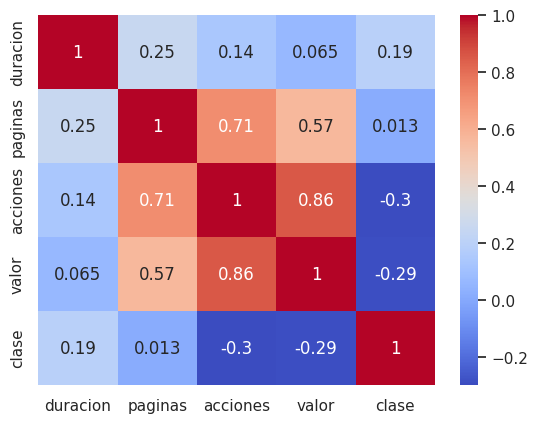

In [ ]:
# Matriz de correlación
correlation_matrix = df.corr()

# Heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Análisis de las Correlaciones:

1. Duración: La mayoría de las duraciones están concentradas cerca de 0, con una disminución gradual a medida que aumenta la duración. Hay unos pocos valores extremos que alcanzan más de 800.
2.  Páginas: La mayoría de los datos tienen 1 o 2 páginas. El número de páginas disminuye drásticamente después de 2, con muy pocos registros con más de 5 páginas.
3.  Acciones: La mayoría de las acciones están concentradas entre 0 y 10, con una disminución gradual a medida que el número de acciones aumenta. Hay unos pocos valores extremos que alcanzan hasta 60 acciones.
4.  Valor: La mayoría de los valores están concentrados cerca de 0, con una disminución gradual a medida que el valor aumenta. Hay unos pocos valores extremos que alcanzan hasta 350.
5.  Clase: Hay tres clases distintas, representadas como 0, 1 y 2. La clase 0 tiene la mayor cantidad de registros, seguida por la clase 2, y la clase 1 tiene la menor cantidad de registros.



-----
# Análisis de componentes principales PCA
----

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separar variables independientes y dependiente
X = df[['duracion', 'paginas', 'acciones', 'valor']]
y = df['clase']

In [ ]:
# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Realización de PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Porcentaje de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_


In [ ]:
# Porcentaje de varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance)


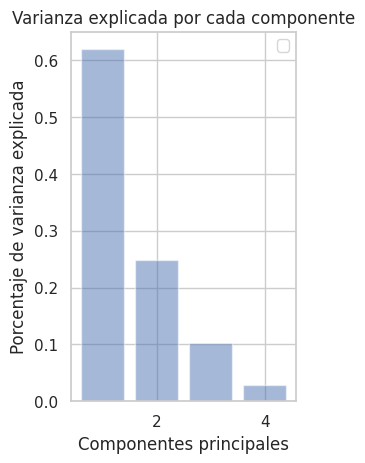

In [ ]:
plt.subplot(1, 2, 2)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', )
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Varianza explicada por cada componente')
plt.legend()

* El primer componente principal (PC1) explica aproximadamente el 60% de la varianza total. Esto significa que este primer componente es el que mejor resume la información contenida en los datos originales.
* El segundo componente principal (PC2) explica alrededor del 25% de la varianza. Aunque es menos importante que el primero, sigue siendo significativo.
* Los componentes posteriores (PC3 y PC4) explican una proporción mucho menor de la varianza. Esto sugiere que la mayor parte de la información relevante está contenida en los dos primeros componentes.


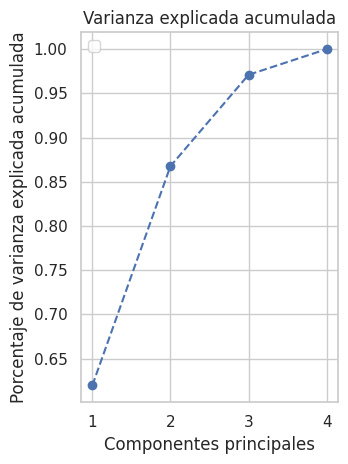

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada acumulada')
plt.title('Varianza explicada acumulada')
plt.legend()
plt.tight_layout()
plt.show()

* Con los primeros dos componentes principales, se explica aproximadamente el 87% de la varianza total. Esto significa que estos dos componentes capturan la mayor parte de la información relevante de los datos.
* Al agregar el tercer componente, se explica alrededor del 97% de la varianza. Esto indica que el tercer componente aporta una información adicional importante, pero en menor medida que los dos primeros.
* Con los cuatro componentes, se explica el 100% de la varianza. Esto es esperable, ya que los componentes principales forman una base completa del espacio de datos.

In [ ]:
# Elegimos el número de componentes que explique la mayor parte de la varianza (por ejemplo, 2 componentes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

----
# Regresión Logística  
----

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Entrenar el modelo de regresión logística
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy del modelo: 0.5531914893617021

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.59      0.92      0.72        25
           1       1.00      0.08      0.15        12
           2       0.29      0.20      0.24        10

    accuracy                           0.55        47
   macro avg       0.63      0.40      0.37        47
weighted avg       0.63      0.55      0.47        47



### Interpretación del Reporte Completo
* Precisión: Mide la proporción de casos positivos identificados correctamente entre todos los casos identificados como positivos. Por ejemplo, para la clase 0, el modelo identificó correctamente como 0 el 59% de los casos que realmente eran 0.
* Recall: Mide la proporción de casos positivos correctamente identificados entre todos los casos que realmente son positivos. Por ejemplo, para la clase 0, el modelo identificó correctamente como 0 el 92% de todos los casos que eran 0.
* F1-score: Es la media armónica de precisión y recall, proporcionando un equilibrio entre ambas métricas.
----
### Análisis por clase:

* Clase 0: El modelo tiene un buen recall, lo que significa que identifica correctamente la mayoría de los casos positivos de esta clase. Sin embargo, la precisión es un poco más baja, lo que indica que también clasifica algunos casos negativos como positivos.
* Clase 1: El modelo tiene una precisión perfecta (1.00), pero un recall muy bajo. Esto sugiere que el modelo es muy cauteloso al clasificar casos como pertenecientes a la clase 1, pero a costa de perder muchos casos positivos.
* Clase 2: Tanto la precisión como el recall son bajos para esta clase, lo que indica que el modelo tiene dificultades para clasificar correctamente los casos pertenecientes a la clase 2.
----
### Análisis general:

* Desempeño desigual: El modelo muestra un desempeño muy desigual entre las diferentes clases.
* Desbalance de clases: La diferencia en el número de ejemplos para cada clase (support) puede influir en el desempeño del modelo.
* Necesidad de mejora: Un accuracy de 0.55 sugiere que el modelo no es muy preciso en general.

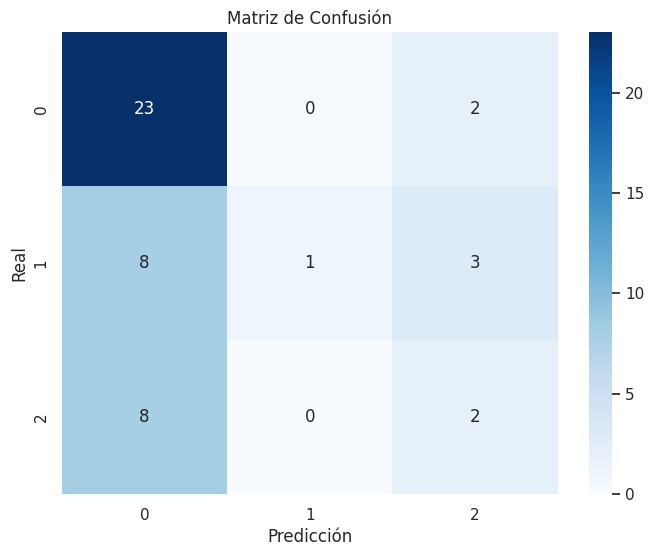

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### Análisis por clases:

* Clase 0: El modelo clasifica correctamente la mayoría de los casos como clase 0 (23 de 23), lo que indica un alto nivel de precisión para esta clase.
* Clase 1: El modelo tiene dificultades para clasificar correctamente los casos de la clase 1. De los 12 casos reales de la clase 1, solo 1 fue clasificado correctamente.
* Clase 2: El modelo también tiene problemas para clasificar correctamente los casos de la clase 2. De los 10 casos reales de la clase 2, solo 2 fueron clasificados correctamente.

#### Conclusiones generales:

* Desempeño desigual: El modelo muestra un desempeño muy desigual entre las diferentes clases. Es mucho más preciso en la clasificación de la clase 0 que en las clases 1 y 2.
* Sesgo hacia la clase 0: El modelo parece tener un sesgo hacia la clase 0, clasificando muchos casos como pertenecientes a esta clase, incluso cuando en realidad pertenecen a otras clases.
*Necesidad de mejora: Los resultados sugieren que el modelo necesita ser mejorado, especialmente en la clasificación de las clases 1 y 2.